# 1. Import Libraries

* Import the required libraries.

In [1]:
#pip install Unidecode

In [2]:
#pip install --user -U nltk

In [3]:
#pip install beautifulsoup4

In [4]:
import re
import os
import math
import nltk
import pickle
import warnings
import unidecode
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from bs4 import BeautifulSoup

In [5]:
pd.options.display.max_columns = None # To display all the columns of a Dataframe.
warnings.filterwarnings('ignore') # Ignore any warnings and do not show them in the cell output.

----

# 2. Data Pre-processing

* We will perform the data-preprocessing of the comment text by performing various operations as listed below:<br>
&emsp; 1. Remove HTML Tags.<br>
&emsp; 2. Remove accented characters.<br>
* We will create utility functions to perform each of the data-preprocessing operation.

## 2.1. Remove HTML Tags

* HTML Tags does not add much value towards understanding and analyzing texts.

In [6]:
def removeHTMLTags(text):
    '''
    Function to remove the HTML Tags from a given text.
    
    Parameter:
    ---------
    text: str
        Text from which the HTML tags has to be removed.
    '''
    
    # Reference: 'Remove html tags using BeautifulSoup' - https://www.geeksforgeeks.org/remove-all-style-scripts-and-html-tags-using-beautifulsoup/
    
    # Create a BeautifulSoup object to parse the given html text content
    soup = BeautifulSoup(text, 'html.parser')
    
    # Remove the <style> and <script> tags from the html content because they contains the styling sheet and javascript
    # file references and won't give any meaningful context.
    for data in soup(['style', 'script']):
        
        # Remove tag
        data.decompose()
        
    # Return the html tag free content
    return ' '.join(soup.stripped_strings)

#### Example - Removal of html tags

In [7]:
# Let's consider an html content
html = '''
        <html>
            <head>
                <title>Case Study</title>
                <style>.class { font-color: blue; }</style>
                <script>function(){ console.log('This is a JavaScript Code'); }</script>
            </head>
            <body>
                <h1>Jigsaw Unintended Bias</h1>
                <h2>Toxicity Classification<h2>
            </body>
        </html>
        '''

# Call the function 'removeHTMLTags()' to remove the html tags from the html content
removeHTMLTags(html)

'Case Study Jigsaw Unintended Bias Toxicity Classification'

----

## 2.2. Remove Accented Characters

* We may receive some accented characters/letters in comments. E.g., résumé, tête-à-tête, etc.
* The most common accents are the acute (é), grave (è), circumflex (â, î or ô), tilde (ñ), umlaut and dieresis (ü or ï – the same symbol is used for two different purposes), and cedilla (ç). Accent marks (also referred to as diacritics or diacriticals) usually appear above a character. [Reference](https://www.fonts.com/content/learning/fontology/level-3/signs-and-symbols/accents)
* We need to ensure that we convert and standardize such characters to ASCII characters.

In [8]:
def removeAccentedChars(text):
    '''
    Function to remove the accented characters from a given text.
    
    Parameter:
    ---------
    text: str
        Text from which the accented character has to be removed.
    '''
    
    # Reference: "remove accented characters python" - https://www.geeksforgeeks.org/how-to-remove-string-accents-using-python-3/
    
    # Remove accents
    return unidecode.unidecode(text)

#### Example - Removal of accented characters

In [9]:
# String containing accented characters
accentedStr = 'Sómě Áccěntěd těxt: orčpžsíáýd stävänger hell°'

# Call the function 'removeAccentedChars()' to remove the accented characters from the text.
removeAccentedChars(accentedStr)

'Some Accented text: orcpzsiayd stavanger helldeg'

----

## 2.3. Convert to Lowercase

* Convert the comment text to lower case before doing further preprocessing.
* Texts in lowercase help in the process of preprocessing and in later stages in NLP.
* Converting the text to lowercase is pretty easy.

In [10]:
def lowercase(text):
    '''
    Function to convert a given text to its lowercase.
    
    Parameter:
    ---------
    text: str
        Text that has to be converted to lowercase.
    '''
    
    return text.lower()

#### Example - Converting a text to lowercase

In [11]:
# String containing few words with uppercase letters.
upStr = 'Converting a TEXT to its Lowercase is very simple.'

# Call the function 'lowercase()' to convert the text to its lowercase.
lowercase(upStr)

'converting a text to its lowercase is very simple.'

----

## 2.4. Remove IP Address, Hyperlinks and Number

* Remove any IP Address, Hyperlinks and numbers from the comment text as they won't add any value to perform the toxicity classification.

In [12]:
def removeIPLinkNum(text, ipAddress=True, hyperlink=False, numbers=True):
    '''
    Function to remove IP Address and Number from the given text.
    
    Parameter:
    ---------
    text: str
        Text from which IP Address and number(s) have to be removed.
    '''
    
    # Replace IP Address with empty string.
    # Reference: 'Remove IP Address Python' - https://www.geeksforgeeks.org/extract-ip-address-from-file-using-python/#:~:text=The%20regular%20expression%20for%20valid,%5C.)%7B
    if ipAddress == True:
        
        text = re.sub(r'((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)', '', text)
    
    # Remove hyperlinks
    # Reference: 'Regex for hperlinks Python' - https://www.geeksforgeeks.org/python-check-url-string/
    if hyperlink == True:
        
        text = re.sub(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", "", text)
    
    # Remove numbers.
    if numbers == True:
        
        text = re.sub(r'[0-9]', '', text)
    
    # Remove the extra space if any.
    text = re.sub(r'[ ][ ]+', ' ', text)
    
    return text

#### Example - Removal of IP Address, Hyperlinks and numbers

In [13]:
%%time
# Text containing few IP Addresses, Hyperlinks and numbers.
ipLinkNum = 'Ping 192.128.10.10 to connect to the site https://www.infinity.com/ and get the numbers between 1 and 1000'

# Call the 'removeIPLinkNum()' to remove the IP Address, Hyperlinks and numbers from the text.
removeIPLinkNum(ipLinkNum, hyperlink=True)

CPU times: user 1.02 ms, sys: 646 µs, total: 1.66 ms
Wall time: 1.68 ms


'Ping to connect to the site and get the numbers between and '

----

## 2.5. Replace Emoticons with the corresponding words

* Replace the emoticons with the corresponding words like ":-(" by "sad". 

In [14]:
# Dictionary containing the emoticons and their corresponding words.
# Reference: https://pc.net/emoticons/
emoticonsDict = {
    '(.V.)': 'alien',
    'O:-)': 'angel',
    'X-(': 'angry',
    '~:0': 'baby',
    ':-D': 'big grin',
    ':-#': 'braces',
    '=^.^=': 'cat',
    '*<:o)': 'clown',
    'O.o': 'confused',
    'B-)': 'cool',
    ':_(': 'crying',
    '\:D/': 'dancing',
    '*-*': 'dazed',
    ':o3': 'dog',
    '#-o': 'doh',
    ':*)': 'drunk',
    '//_^': 'emo',
    '>:)': 'evil grin',
    '<><': 'fish',
    ':(': 'frown',
    ':-(': 'frown',
    ':-(': 'frowning',
    '=P': 'frustrated',
    ':-P': 'frustrated',
    '8-)': 'glasses',
    '$_$': 'greedy',
    ':->': 'grin',
    ':-)': 'happy',
    ':)': 'happy',
    '=)': 'happy',
    '#': 'hashtag',
    '<3': 'heart',
    '{}': 'hug',
    ':-|': 'indifferent',
    'X-p': 'joking',
    ':*': 'kiss',
    ':-*': 'kiss',
    ':-)*': 'kiss',
    '(-}{-)': 'kissing',
    'XD': 'laughing',
    '=D': 'laughing out loud',
    ')-:': 'left-handed sad face',
    '(-:': 'Left-handed smiley face',
    '<3': 'love',
    '=/': 'mad',
    ':-)(-:': 'married',
    '@': 'mention',
    '<:3)~': 'mouse',
    '~,~': 'napping',
    ':-B': 'nerd',
    '^_^': 'overjoyed',
    '<l:0': 'partying',
    ':-/': 'perplexed',
    '=8)': 'Pig',
    '@~)~~~~': 'rose',
    ':-(': 'sad',
    ':(': 'sad',
    '=(': 'sad',
    ':S': 'sarcastic',
    ':-@': 'screaming',
    '=O': 'shocked',
    ':-o': 'shocked',
    ':-Q': 'smoking',
    ':>': 'smug',
    ':P': 'sticking tongue out',
    ':o': 'surprised',
    ':-J': 'tongue in cheek',
    ':-&': 'tongue tied',
    '=-O': 'uh-oh',
    ':-E': 'vampire',
    '=D': 'very happy',
    ';-)': 'winking',
    ';)': 'winking',
    '|-O': 'yawn',
    '8-#': 'zombie'
}

In [15]:
# Replace Emoticons with correponding words
def replaceEmoticons(text):
    
    for emoticon in emoticonsDict:
        
        word = "_".join(emoticonsDict[emoticon].split())
        
        text = text.replace(emoticon, ' ' + word + ' ')
        
        # Remove the extra space if any.
        text = re.sub(r'[ ][ ]+', ' ', text)
    
    return text

#### Example - Replace emoticons with words

In [16]:
%%time
# Define a text with certain emoticons
text = 'In Joy, people are :-) and in despair, people are :-('

# Call the 'replaceEmoticons()' to replace emoticons by their corresponding words.
replaceEmoticons(text)

CPU times: user 108 µs, sys: 68 µs, total: 176 µs
Wall time: 181 µs


'In Joy, people are happy and in despair, people are sad '

----

## 2.6. Remove Special Characters

* Remove special characters except the below four characters:
## <font color="blue">**'** **.** **?** **!**</font>

In [17]:
def removeSpecialChars(text, removeAll=False):
    '''
    Function to remove the special characters from the given text.
    
    Parameter:
    ---------
    text: str
        Text from which the special characters have to be removed.
    removeAll: boolean
        Flag to check whether to remove all special characters or all except ' . ? !
    '''
    
    if removeAll == True:
        
        text = re.sub(r'[^A-Za-z ]+', '', text) # Remove all special characters.
        
    else:
        
        text = re.sub(r'[^A-Za-z\'.?! ]+', '', text) # Remove all special characters except ' . ? !
        
    # Remove the extra space if any.
    text = re.sub(r'[ ][ ]+', ' ', text)
    
    return text

#### Example - Removal of special characters

In [18]:
%%time
# Define a text with some special characters in it
text = 'This # is ! a \' sentence % with & some speci@al characters. Is\'nt it?'

# Call the 'removeSpecialChars()' to remove the special characters from a text.
removeSpecialChars(text)

CPU times: user 137 µs, sys: 86 µs, total: 223 µs
Wall time: 232 µs


"This is ! a ' sentence with some special characters. Is'nt it?"

----

## 2.7. Add space around Sentence End Markers and remove duplicates

* Add one space around sentence end markers and remove duplicate end markers. 
* If there are multiple same end markers separated by space or without space, then a single end marker will be used and space between them, will be removed.
* For example:<br>
&emsp; i. ' !! ' $\longrightarrow$ ' ! '<br>
&emsp; ii. ' ?   ? ' $\longrightarrow$ ' ? '<br>
* This is done to not lose information about these marks at the stage of transformation of the text into a word embedding.
* This can be omitted while using BERT.
* The following end markers will be considered:<br>
&emsp; i. **!**<br>
&emsp; ii. **?**<br>
&emsp; iii. **.**<br>


In [19]:
def processSpecialTokens(text, isBERTUsed=False):
    '''
    Function to add one space around sentence end markers and remove duplicates.
    
    Parameter:
    ---------
    text: str
        Text in which space has to be added around sentence end tokens.
    isBERTUsed: boolean
        Boolean flag to indicate if BERT is used in the modelling, then do not apply this pre-processing.
    '''
    
    if (isBERTUsed == False):
    
        text = re.sub(r'[!]+[ ]*[!]*', ' ! ', text) # Add space around ! with exclmrk.
        text = re.sub(r'[?]+[ ]*[?]*', ' ? ', text) # Replace ? with qstmrk.
        text = re.sub(r'[.]+[ ]*[.]*', ' . ', text) # Replace . with eosmkr.

        # Remove the extra space if any.
        text = re.sub(r'[ ][ ]+', ' ', text)
    
    return text

#### Example - Add space around Sentence End Markers and remove duplicates

In [20]:
%%time
# Define a text containing special tokens
text = 'This is amazing! Is\'nt it?? ?? We should do more such stuffs.!! !!!'

# Call the 'processSpecialTokens()' to replace special tokens with words.
processSpecialTokens(text)

CPU times: user 213 µs, sys: 135 µs, total: 348 µs
Wall time: 356 µs


"This is amazing ! Is'nt it ? We should do more such stuffs . ! "

----

## 2.8. Decontraction

* A contraction, or short form, is an abbreviated form of a word of words, from which one or more letters have been left out and replaced by an apostrophe. [Reference](https://typely.com/blogs/entry/15-how-to-use-english-contractions-correctly-with-word-list-and-examples/). They're are very common in english sentences.
* For example:<br>
&emsp; i. I am $\longrightarrow$ I'm.<br>
&emsp; ii. He is $\longrightarrow$ He's.<br>
&emsp; iii. It is $\longrightarrow$ It's.<br>
&emsp; iv. We will $\longrightarrow$ We'll.<br>
* We need to de-contract (opposite of contraction) the words to its original form, to help with text standardization.


* Here we will use a dictionary (contraction map) containing the contracted form in its keys and their corresponding expanded form in its values.

In [21]:
# Reference- https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/contractions.py
contractionMap = {
    'ain\'t': 'is not',
    'aren\'t': 'are not',
    'can\'t': 'cannot',
    'can\'t\'ve': 'cannot have',
    '\'cause': 'because',
    'could\'ve': 'could have',
    'couldn\'t': 'could not',
    'couldn\'t\'ve': 'could not have',
    'didn\'t': 'did not',
    'doesn\'t': 'does not',
    'don\'t': 'do not',
    'hadn\'t': 'had not',
    'hadn\'t\'ve': 'had not have',
    'hasn\'t': 'has not',
    'haven\'t': 'have not',
    'he\'d': 'he would',
    'he\'d\'ve': 'he would have',
    'he\'ll': 'he will',
    'he\'ll\'ve': 'he he will have',
    'he\'s': 'he is',
    'how\'d': 'how did',
    'how\'d\'y': 'how do you',
    'how\'ll': 'how will',
    'how\'s': 'how is',
    'I\'d': 'I would',
    'I\'d\'ve': 'I would have',
    'I\'ll': 'I will',
    'I\'ll\'ve': 'I will have',
    'I\'m': 'I am',
    'I\'ve': 'I have',
    'i\'d': 'i would',
    'i\'d\'ve': 'i would have',
    'i\'ll': 'i will',
    'i\'ll\'ve': 'i will have',
    'i\'m': 'i am',
    'i\'ve': 'i have',
    'isn\'t': 'is not',
    'it\'d': 'it would',
    'it\'d\'ve': 'it would have',
    'it\'ll': 'it will',
    'it\'ll\'ve': 'it will have',
    'it\'s': 'it is',
    'let\'s': 'let us',
    'ma\'am': 'madam',
    'mayn\'t': 'may not',
    'might\'ve': 'might have',
    'mightn\'t': 'might not',
    'mightn\'t\'ve': 'might not have',
    'must\'ve': 'must have',
    'mustn\'t': 'must not',
    'mustn\'t\'ve': 'must not have',
    'needn\'t': 'need not',
    'needn\'t\'ve': 'need not have',
    'o\'clock': 'of the clock',
    'oughtn\'t': 'ought not',
    'oughtn\'t\'ve': 'ought not have',
    'shan\'t': 'shall not',
    'sha\'n\'t': 'shall not',
    'shan\'t\'ve': 'shall not have',
    'she\'d': 'she would',
    'she\'d\'ve': 'she would have',
    'she\'ll': 'she will',
    'she\'ll\'ve': 'she will have',
    'she\'s': 'she is',
    'should\'ve': 'should have',
    'shouldn\'t': 'should not',
    'shouldn\'t\'ve': 'should not have',
    'so\'ve': 'so have',
    'so\'s': 'so as',
    'that\'d': 'that would',
    'that\'d\'ve': 'that would have',
    'that\'s': 'that is',
    'there\'d': 'there would',
    'there\'d\'ve': 'there would have',
    'there\'s': 'there is',
    'they\'d': 'they would',
    'they\'d\'ve': 'they would have',
    'they\'ll': 'they will',
    'they\'ll\'ve': 'they will have',
    'they\'re': 'they are',
    'they\'ve': 'they have',
    'to\'ve': 'to have',
    'wasn\'t': 'was not',
    'we\'d': 'we would',
    'we\'d\'ve': 'we would have',
    'we\'ll': 'we will',
    'we\'ll\'ve': 'we will have',
    'we\'re': 'we are',
    'we\'ve': 'we have',
    'weren\'t': 'were not',
    'what\'ll': 'what will',
    'what\'ll\'ve': 'what will have',
    'what\'re': 'what are',
    'what\'s': 'what is',
    'what\'ve': 'what have',
    'when\'s': 'when is',
    'when\'ve': 'when have',
    'where\'d': 'where did',
    'where\'s': 'where is',
    'where\'ve': 'where have',
    'who\'ll': 'who will',
    'who\'ll\'ve': 'who will have',
    'who\'s': 'who is',
    'who\'ve': 'who have',
    'why\'s': 'why is',
    'why\'ve': 'why have',
    'will\'ve': 'will have',
    'won\'t': 'will not',
    'won\'t\'ve': 'will not have',
    'would\'ve': 'would have',
    'wouldn\'t': 'would not',
    'wouldn\'t\'ve': 'would not have',
    'y\'all': 'you all',
    'y\'all\'d': 'you all would',
    'y\'all\'d\'ve': 'you all would have',
    'y\'all\'re': 'you all are',
    'y\'all\'ve': 'you all have',
    'you\'d': 'you would',
    'you\'d\'ve': 'you would have',
    'you\'ll': 'you will',
    'you\'ll\'ve': 'you will have',
    'you\'re': 'you are',
    'you\'ve': 'you have'
}

In [22]:
def decontract(text, isBERTUsed=False):
    '''
    Function to decontract a given text.
    
    Parameter:
    ---------
    text: str
        Text to be decontracted.
    isBERTUsed: boolean
        Boolean flag to indicate if BERT is used in the modelling, then do not apply this pre-processing.
    '''
    
    if isBERTUsed==False:
    
        # Iterate through all the contraction keys and replace the keys with their corresponding values (expanded form)
        for word in contractionMap.keys():

            text = lowercase(text) # Convert to lowercase.
            text = re.sub(word, contractionMap[word], text) # Replace the contracted word with its decontracted form.
        
    return text

#### Example - Decontracting a text

In [23]:
%%time
# Text containing few contracted words.
contractText = "You've got the potential they won't believe."

# Call the 'decontract()' function to decontract a given text. 
decontract(contractText)

CPU times: user 4.21 ms, sys: 132 µs, total: 4.34 ms
Wall time: 4.82 ms


'you have got the potential they will not believe.'

----

## 2.9. Common Function

* Include all the above data-preprocessing functions inside a single function that can be used to perform the preprocessing on the data.

In [24]:
def preprocess(text, html=True, accent=True, lower=True, ipLinkNum=True, emoticon=True, specialChar=True, 
               specialToken=True, decontraction=True, isBERTUsed=False, removeAllSpecialChar=False, hyperlink=False):
    '''
    Function to perform all the data-preprocessing on a given text.
    
    Parameters:
    ----------
    text: str
        Text on which the pre-processing has to be performed.
    html: boolean
        Flag to check whether to remove html tags from the text or not.
    accent: boolean
        Flag to check whether to remove the accented characters from the text or not.
    lower: boolean
        Flag to check whether to perform lowercase on the text or not.
    ipLinkNum: boolean
        Flag to check whether to remove the IP Address, Hyperlink(s) and number(s) from the text or not.
    emoticon: boolean
        Flag to check whether to replace the emoticons with their corresponding words in the text or not.
    specialChar: boolean
        Flag to check whether to remove the special characters from the text or not.
    specialToken: boolean
        Flag to check whether to replace the special tokens with their corresponding words in the text or not.
    decontraction: boolean
        Flag to check whether to do decontraction in the given text or not.
    isBERTUsed: boolean
        Boolean flag to indicate if BERT is used in the modelling, then do not apply this pre-processing.
    removeAllSpecialChar: boolean
        Flag to check whether to remove all special characters or all except ' . ? !
    hyperlink: boolean
        Flag to check whether to remove the hyperlink from the text or not.
    '''
    
    if html == True:
        
        # Call the function 'removeHTMLTags()' to remove the html tags from the html content
        text = removeHTMLTags(text)
        
    if accent == True:
        
        # Call the function 'removeAccentedChars()' to remove the accented characters from the text.
        text = removeAccentedChars(text)
        
    if lower == True:
        
        # Call the function 'lowercase()' to convert the text to its lowercase.
        text = lowercase(text)
        
    if ipLinkNum == True: 
        
        # Call the 'removeIPLinkNum()' to remove the IP Address, Hyperlinks and numbers from the text.
        text = removeIPLinkNum(text, hyperlink=hyperlink)
        
    if emoticon == True:
        
        # Call the 'replaceEmoticons()' to replace emoticons by their corresponding words.
        text = replaceEmoticons(text)
        
    if specialChar == True:
        
        # Call the 'removeSpecialChars()' to remove the special characters from a text.
        text = removeSpecialChars(text, removeAllSpecialChar)
        
    if specialToken == True:
        
        # Call the 'processSpecialTokens' to add space around sentence end tokens.
        text = processSpecialTokens(text, isBERTUsed)
        
    if decontraction == True:
        
        # Call the 'decontract()' function to decontract a given text. 
        text = decontract(text, isBERTUsed)
        
    return text

#### Example - All data-preprocessing

In [25]:
%%time

# Define a text
text = 'The content is downloaded from http://www.wikipedia.com , which could\'ve also been downloaded from the IP Address\
        192.128.10.10. The content has some html content as well (<span>Some span content</span>). Few accent characters:\
        orčpžsíáýd stävänger hell. The content was downloaded in 2022. Isn\'t that a recent activity? :-) &*!@&'

# Call the 'preprocess()' function to pre-process the text.
preprocess(text, hyperlink=True)

CPU times: user 1.13 ms, sys: 0 ns, total: 1.13 ms
Wall time: 1.14 ms


'the content is downloaded from which could have also been downloaded from the ip address . the content has some html content as well some span content . few accent characters orcpzsiayd stavanger hell . the content was downloaded in . is not that a recent activity ? happy ! mention '

----

## 2.10. Apply the data pre-processing on the comment text

* Now, we will apply the data-preprocessing on the comment text of the training dataset.

In [26]:
!wget --header="Host: doc-04-10-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.82 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_mfgrrukgmoqg76paq1gkjlfboihjk812_nonce=642qq2o6cg9au" --header="Connection: keep-alive" "https://doc-04-10-docs.googleusercontent.com/docs/securesc/fckgg2akm2f15nomsl874oot9rknpjcm/rt84jn4kdr46v5qclb3n883q2lvdid4l/1647931425000/11798134008544481510/11798134008544481510/1G0Rx5jTy-1wIaTHvx6GMlu_0tg5mwQvN?e=download&ax=ACxEAsYPlzX3fzwBpPht5pYedCi2f37qlslfkY4GlyQ6wcVfxNDTdb9dsbaPwl1e_G-hdMyIn9CBiQcPI9bc7FX0qCCLPgS3Cj0e9u99zUR4rngpDQYSQXNww2JErlASWSh_zt1kWaGd8_4xvsnnIN1NVAP2oAq-MYF5KwGR4n9_uVmQw-eqDBBKT8rLb3x3c-TK3VWZwRszkRHwN-ZkVySgce2wHfpr47JaG409HuIv9qmhOM3A9_lagg725DHTVGwptVTNW5Cqv2bL8mkNcr77x6YF8ODL62_P16eVh9gWiowihG6O4Wbx8ece_K9-xucUw0q-SD0F7Tfc69af7W4tfTH9d6h6hgl8aGb9zJ1XPJGNM2oEpg8YXmCpk7nQzZ1kZ3o-ojNYrbtis88tBoEkkrYrqQyF3QJ9kv5KHnRt1WiWPyvamq8bDgqFyh0tkXwtHCyKGEou1dQPaRvUMKM7ULw9u_WVWScLX5IgN2qCb4c1X_NUrT8g3KEtE91nu6knj8UgYVCdZnAW_dpgl0sKsIO-gZX9sxvLImnQNkgz3dioq5A6aoimP2C8O3iwfMza2eggRCTWEclB97qDu-_sNWEmsh-ivabn-qwlglh-uwW_Wm0NAy2rMQExC3aEp0QwiepfQxzeR5j9md8mUS2WYQyHD0r8X34DaehwMsfq5257TACazRBJDvymni7WlxafIqt7b97EQwy3MlwpeKOlicAuHCrL-9O-Pl8S5FHrQ5zis8a_3bHvGAJJ74JW6FBxWuJBPA6KtEteE2EHu3npIrYDCQu6W7UO47Cm_GoKXhNF51gMfxwchiHakiuI_7WI5Qc2ko3NyAE3zV_ACzFUdXo3GQ&authuser=0&nonce=642qq2o6cg9au&user=11798134008544481510&hash=06k4pj7lc07vesmtotutmalt6qt4s28m" -c -O 'preprocessed_train.csv'

--2022-03-22 06:44:47--  https://doc-04-10-docs.googleusercontent.com/docs/securesc/fckgg2akm2f15nomsl874oot9rknpjcm/rt84jn4kdr46v5qclb3n883q2lvdid4l/1647931425000/11798134008544481510/11798134008544481510/1G0Rx5jTy-1wIaTHvx6GMlu_0tg5mwQvN?e=download&ax=ACxEAsYPlzX3fzwBpPht5pYedCi2f37qlslfkY4GlyQ6wcVfxNDTdb9dsbaPwl1e_G-hdMyIn9CBiQcPI9bc7FX0qCCLPgS3Cj0e9u99zUR4rngpDQYSQXNww2JErlASWSh_zt1kWaGd8_4xvsnnIN1NVAP2oAq-MYF5KwGR4n9_uVmQw-eqDBBKT8rLb3x3c-TK3VWZwRszkRHwN-ZkVySgce2wHfpr47JaG409HuIv9qmhOM3A9_lagg725DHTVGwptVTNW5Cqv2bL8mkNcr77x6YF8ODL62_P16eVh9gWiowihG6O4Wbx8ece_K9-xucUw0q-SD0F7Tfc69af7W4tfTH9d6h6hgl8aGb9zJ1XPJGNM2oEpg8YXmCpk7nQzZ1kZ3o-ojNYrbtis88tBoEkkrYrqQyF3QJ9kv5KHnRt1WiWPyvamq8bDgqFyh0tkXwtHCyKGEou1dQPaRvUMKM7ULw9u_WVWScLX5IgN2qCb4c1X_NUrT8g3KEtE91nu6knj8UgYVCdZnAW_dpgl0sKsIO-gZX9sxvLImnQNkgz3dioq5A6aoimP2C8O3iwfMza2eggRCTWEclB97qDu-_sNWEmsh-ivabn-qwlglh-uwW_Wm0NAy2rMQExC3aEp0QwiepfQxzeR5j9md8mUS2WYQyHD0r8X34DaehwMsfq5257TACazRBJDvymni7WlxafIqt7b97EQwy3MlwpeKOlicAuHCrL-9O-Pl8S5F

In [26]:
%%time
if os.path.isfile('Data/preprocessed_train.csv'):
    
    data = pd.read_csv('Data/preprocessed_train.csv')

else:
    
    data = pd.read_csv('Data/train.csv')
    
    # Preprocess the comment text and store the processed text in a new feature 'preprocessed_text1'
    # data['preprocessed_text1'] = data['comment_text'].apply(preprocess)
    
    lstComments = data['comment_text'] # List of all comment texts
    lstProcessedComments = list() # List to store the preprocess comment texts

    # Preprocess each comment and store in the list 'lstProcessedComments'
    for comment in tqdm(lstComments):
    
        lstProcessedComments.append(preprocess(comment))
        
    # Create a new Feature 'preprocessed_text1' for the new preprocessed comments.
    data['preprocessed_text1'] = lstProcessedComments
    
    data.to_csv('Data/preprocessed_train.csv', index=False)

  0%|          | 0/1804874 [00:00<?, ?it/s]

CPU times: user 17min 28s, sys: 25.2 s, total: 17min 53s
Wall time: 17min 25s


----

# 3. Feature Engineering

* There could be some new features generated from the comment text like no. of words, no, unique words, no. of obscene words, etc.
* Based on correlation of no. of words and no. of unique words features, it was found that they are highly correlated to each other.
* Hence, we will create a new feature to capture the number of words in the comment text.

In [27]:
%%time
# Ensure the comment text preprocessed text are of str type
data['comment_text'] = data['comment_text'].astype(str)
data['preprocessed_text1'] = data['preprocessed_text1'].astype(str)

CPU times: user 470 ms, sys: 16.1 ms, total: 486 ms
Wall time: 484 ms


In [28]:
%%time
# Create two new features 'original_text_wc' and 'preprocessed_text_wc1' for the original text and preprocessed text.
# We will use the 'preprocessed_text_wc1' feature in modelling.
data['original_text_wc'] = data['comment_text'].apply(lambda x: len(x.split()))
data['preprocessed_text_wc1'] = data['preprocessed_text1'].apply(lambda x: len(x.split()))

CPU times: user 11.7 s, sys: 47 ms, total: 11.7 s
Wall time: 11.7 s


In [29]:
%%time
# Save the pre-processed data
data.to_csv('Data/preprocessed_train.csv', index=False)

CPU times: user 48 s, sys: 1.95 s, total: 49.9 s
Wall time: 51.8 s


In [30]:
# Display the original comment text, pre-processed comment text and their word count features.
data[['comment_text', 'original_text_wc', 'preprocessed_text1', 'preprocessed_text_wc1']]

,comment_text,original_text_wc,preprocessed_text1,preprocessed_text_wc1
0,"This is so cool. It's like, 'would you want yo...",19,this is so cool . it is like 'would you want y...,24
1,Thank you!! This would make my life a lot less...,22,thank you ! this would make my life a lot less...,26
2,This is such an urgent design problem; kudos t...,16,this is such an urgent design problem kudos to...,18
3,Is this something I'll be able to install on m...,17,is this something i will be able to install on...,20
4,haha you guys are a bunch of losers.,8,haha you guys are a bunch of losers .,9
...,...,...,...,...
1804869,"Maybe the tax on ""things"" would be collected w...",37,maybe the tax on things would be collected whe...,41
1804870,What do you call people who STILL think the di...,15,what do you call people who still think the di...,16
1804871,"thank you ,,,right or wrong,,, i am following ...",10,thank you right or wrong i am following your a...,10
1804872,Anyone who is quoted as having the following e...,58,anyone who is quoted as having the following e...,64


----

# 4. Plot Correlation Graph

* Let's plot a correlation graph for all the numerical features (including the word count features) in the dataset.

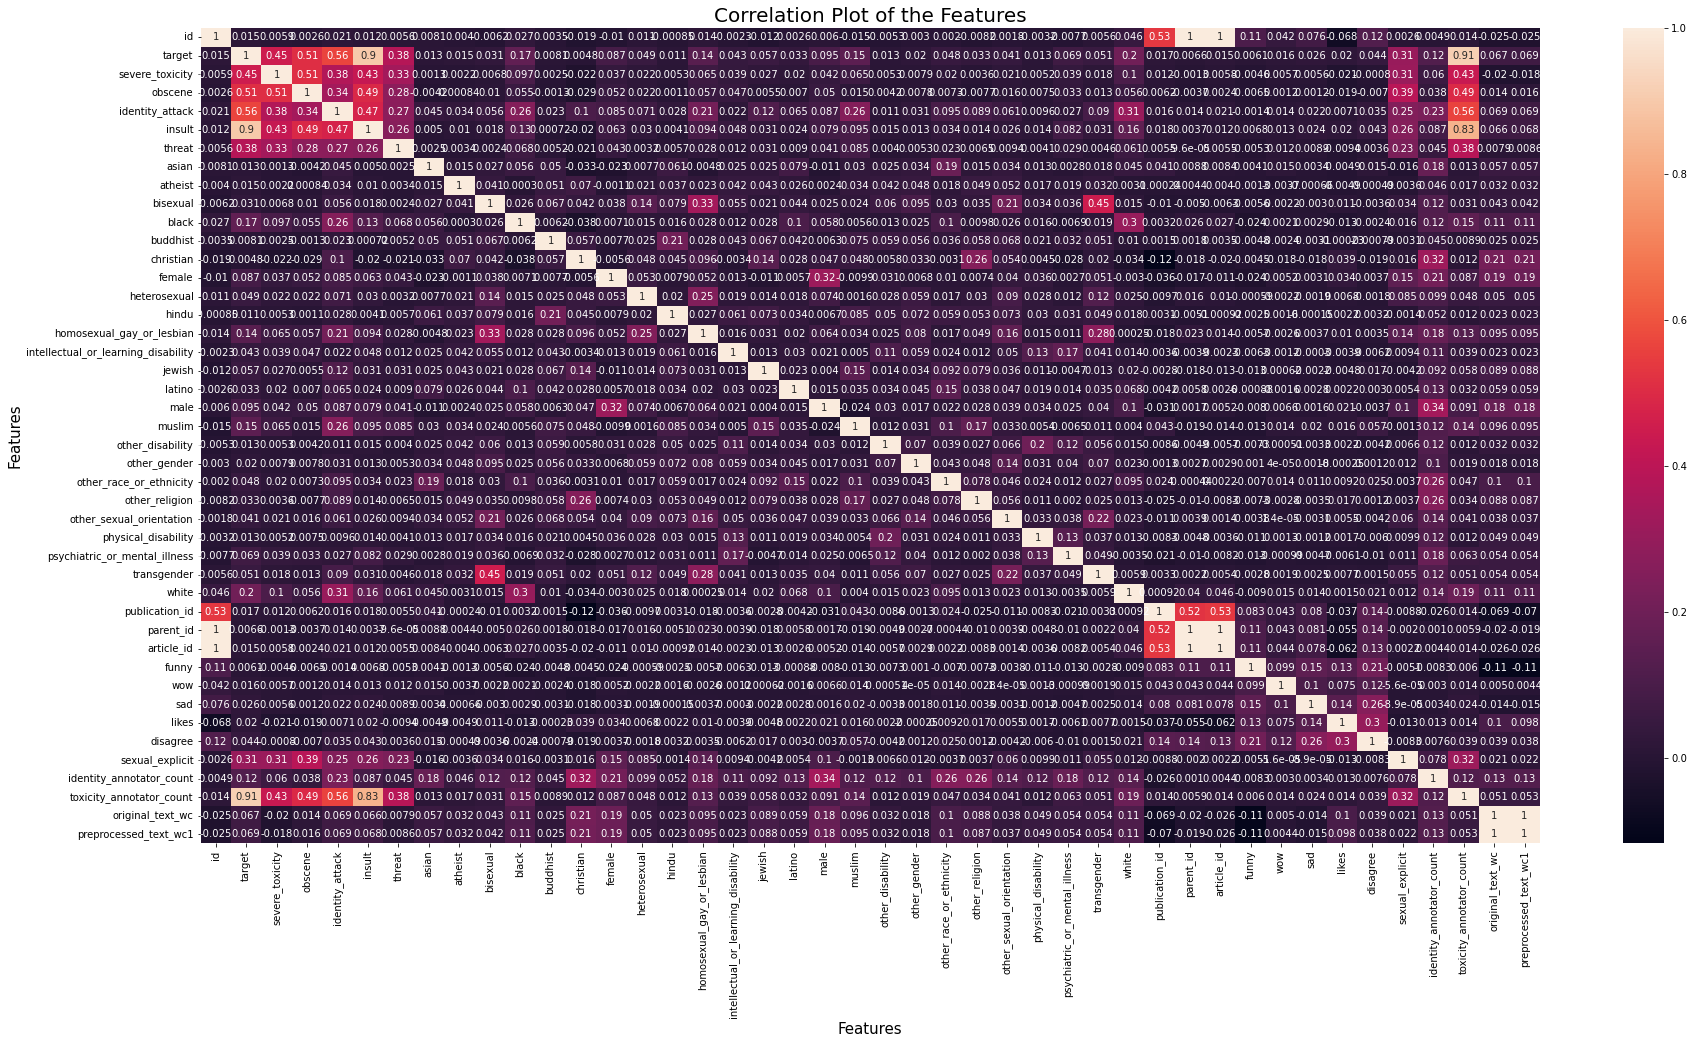

CPU times: user 1min 5s, sys: 1.8 s, total: 1min 6s
Wall time: 1min 6s


In [31]:
%%time
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(method='spearman'), annot=True)
plt.title('Correlation Plot of the Features', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

#### Observation

* We can see that the correlation coefficient between the word counts of original comment texts (original_text_wc) and preprocessed comment texts (preprocessed_text_wc1) is maximum i.e., 1.
* Hence, we can use either of them in modelling.


* Let's check the correlation of the features with the Class Label.

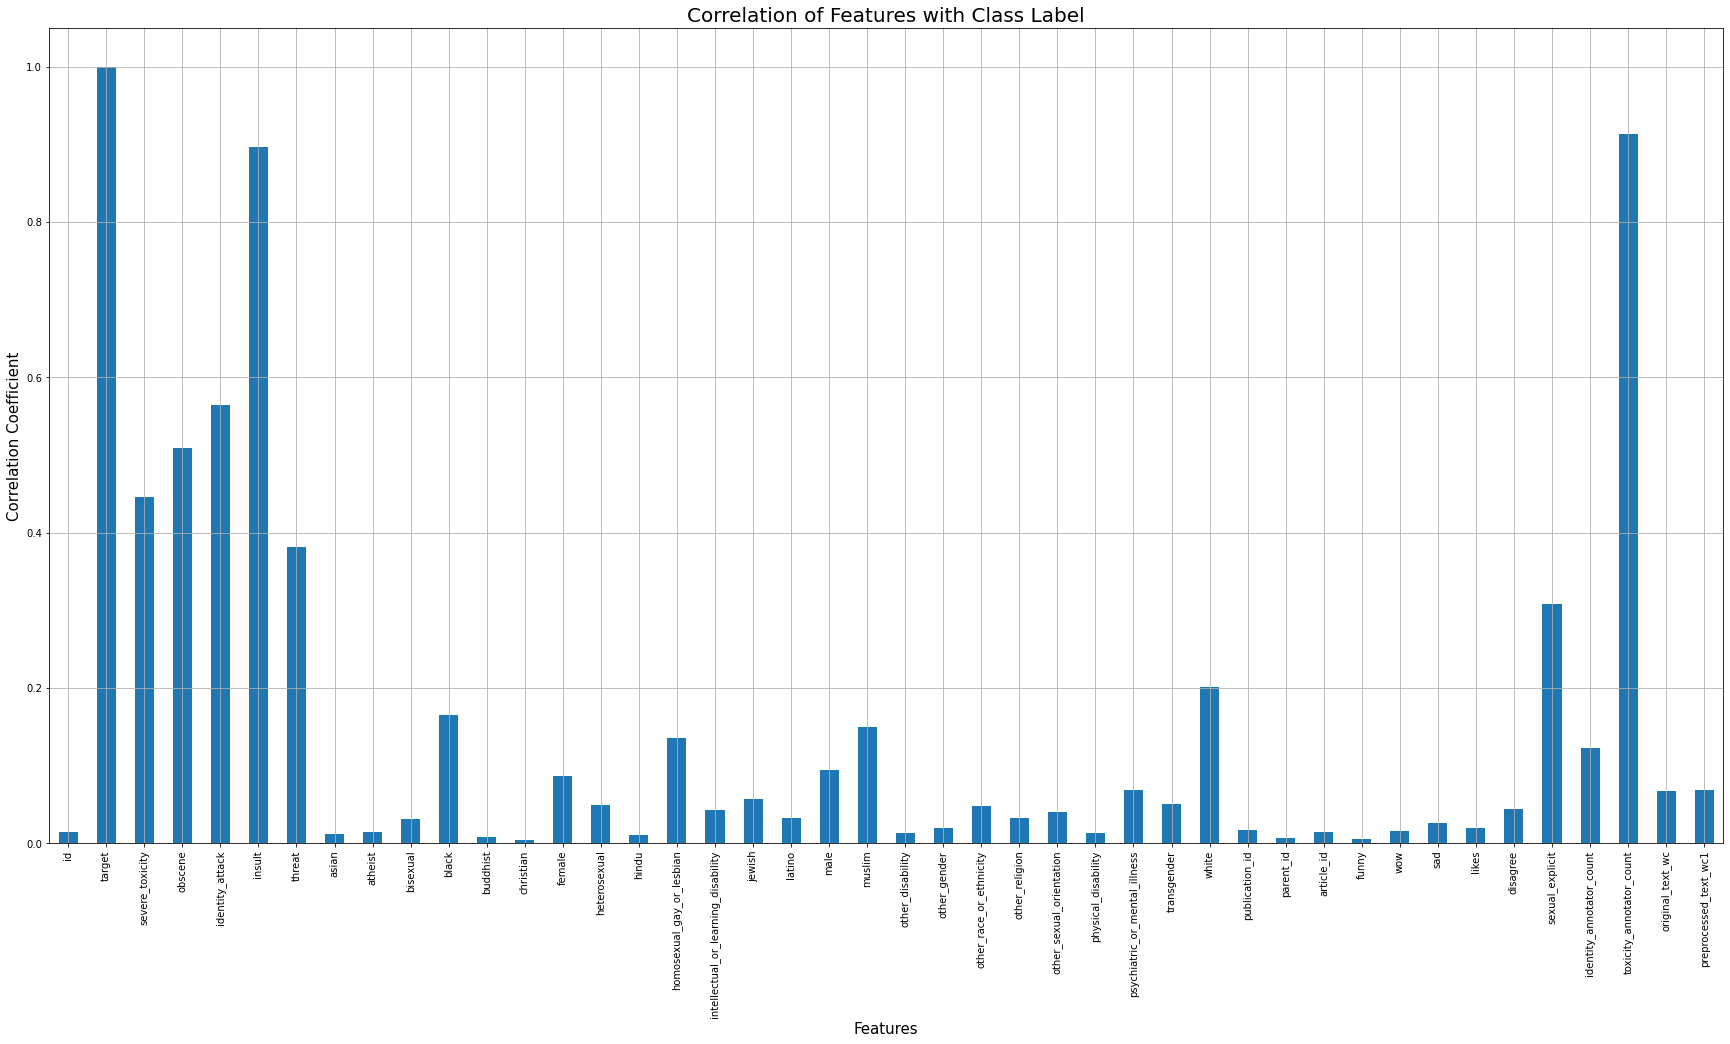

CPU times: user 8.97 s, sys: 956 ms, total: 9.92 s
Wall time: 9.69 s


In [32]:
%%time
plt.figure(figsize=(20,8))
data.corrwith(data['target'], method='spearman').plot.bar(figsize=(30,15), grid=True)
plt.title('Correlation of Features with Class Label', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation Coefficient', fontsize=15)
plt.show()

#### Observation

* We can see that the word count features ('original_text_wc' and 'preprocessed_text_wc1') have very less correlation coefficient with the class label. Hence, we can try using it in modelling, to see if it gives a better performance, otherwise we won't use it.


* The toxicity subgroup features like 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat' and 'sexual_explicit' are having high correlation with the class label. This implies that these are important features.
* Hence, we can use these features in some way while building the models.
* As we won't have these feature available in the real time data (test data), we cannot directly use them as features while designing the models.
* However, we can use these feature to give weightage to the data points while training.


* The 9 identity subgroups viz., 'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish', 'muslim', 'black', 'white', and 'psychiatric_or_mental_illness' are having slightly lesser correlation with the class label as compared to the toxicity subgroups, but more correlation than the word count features.
* These 9 toxicity subgroups are used in the performance metrics, 
defined in the Kaggle Problem.


----